In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [4]:
df = pd.read_parquet("/content/drive/MyDrive/DataMiningProject/202304.parquet")

In [5]:
#df = pd.read_parquet(r'/Users/ironfeast/Desktop/project/data/202304.parquet')
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only
0,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03 00:00,SR6 0AQ,T,N,F,50,None,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
1,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13 00:00,CO6 1SQ,T,N,F,19,None,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A
2,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28 00:00,B90 4TG,T,N,F,37,None,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A
3,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,None,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A
4,{AE76CAF1-F8CC-43F9-8F63-4F48A2857D41},17000,1995-03-10 00:00,S65 1QJ,T,N,L,22,None,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,A,A


In [6]:
df.shape
df.Date_of_Transfer = pd.to_datetime(df.Date_of_Transfer)
df = df.loc[df.index[(df.Date_of_Transfer.dt.year>=2018)&(df.Date_of_Transfer.dt.year<=2018)]].copy()

In [7]:
df.describe()

,price
count,1.035342e+06
mean,3.511011e+05
std,1.850177e+06
min,1.000000e+02
25%,1.450000e+05
50%,2.300000e+05
75%,3.550000e+05
max,5.692000e+08


In [8]:
df.price.min()

100

In [9]:
df.price.max()

569200000

In [10]:
df.price.describe()

count    1.035342e+06
mean     3.511011e+05
std      1.850177e+06
min      1.000000e+02
25%      1.450000e+05
50%      2.300000e+05
75%      3.550000e+05
max      5.692000e+08
Name: price, dtype: float64

In [11]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,price
count,1035342.00
mean,351101.07
std,1850176.57
min,100.00
25%,145000.00
50%,230000.00
75%,355000.00
max,569200000.00


In [12]:
df.price[round(df.price)==1].shape

(0,)

In [13]:
df.drop(df.index[(round(df.price)==1)],inplace=True)#.price.describe()#.apply(lambda s: s.apply('{0:.2f}'.format))
df.shape

(1035342, 16)

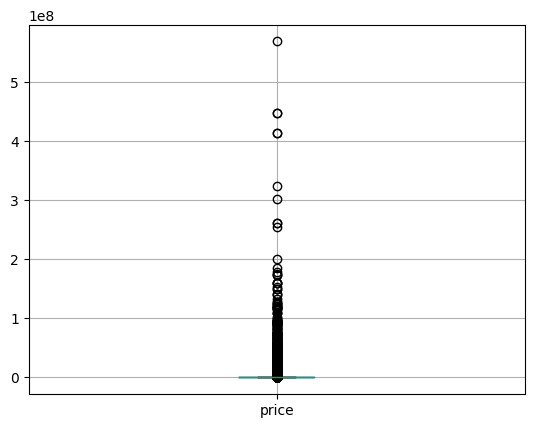

In [14]:
# fig, axs = plt.subplots(1, 1)
# basic plot
df.boxplot(column='price')
plt.show()

# # notched plot
# axs[0, 1].boxplot(data, 1)
# axs[0, 1].set_title('notched plot')

In [15]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,price
count,1035342.00
mean,351101.07
std,1850176.57
min,100.00
25%,145000.00
50%,230000.00
75%,355000.00
max,569200000.00


In [16]:
df.Date_of_Transfer = pd.to_datetime(df.Date_of_Transfer)
df['year'] = df.Date_of_Transfer.dt.year
df.columns

Index(['Transaction_unique_identifier', 'price', 'Date_of_Transfer',
       'postcode', 'Property_Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPDCategory_Type', 'Record_Status - monthly_file_only', 'year'],
      dtype='object')

<Axes: xlabel='year', ylabel='price'>

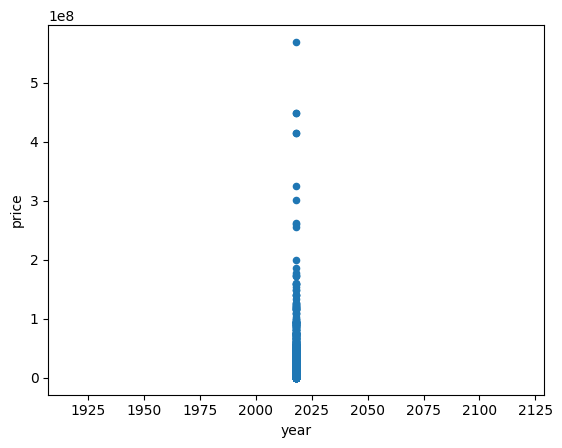

In [17]:
df.plot(y = 'price',x='year',kind='scatter')

In [18]:
df.price[round(df.price)<=1000].shape

(1425,)

In [19]:
df.price[round(df.price)>=10000000].shape

(1431,)

In [20]:
df.price[~((round(df.price)<=10000)|(round(df.price)>=10000000))].shape

(1027840,)

In [21]:
df.price[((round(df.price)<=10000)|(round(df.price)>=10000000))].mean()

5629594.348573714

In [22]:
df.price.mean()

351101.0654054409

In [23]:
df.price[~((round(df.price)<=10000)|(round(df.price)>=10000000))].mean()

312574.3913994396

In [24]:
df[~((round(df.price)<=10000)|(round(df.price)>=10000000))].groupby(['year']).agg({'price':'mean'})

,price
year,
2018,312574.391399


<Axes: xlabel='year'>

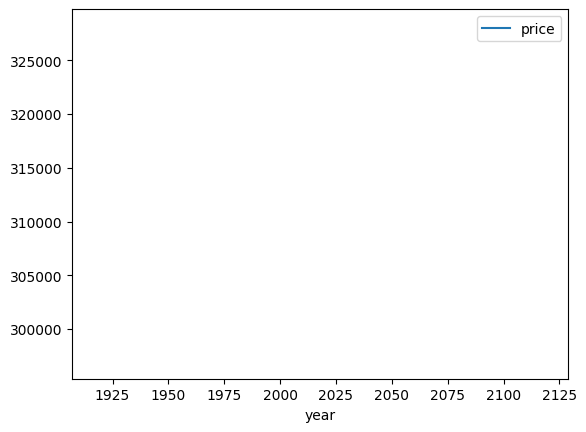

In [25]:
df[~((round(df.price)<=10000)|(round(df.price)>=10000000))].groupby(['year']).agg({'price':'mean'}).plot(kind='line')

In [26]:
print(df[((round(df.price)>=5000)&(round(df.price)<80000))].shape) # Base low
print(df[((round(df.price)>=80000)&(round(df.price)<150000))].shape) # Low
print(df[((round(df.price)>=150000)&(round(df.price)<300000))].shape) # Moderate
print(df[((round(df.price)>=300000)&(round(df.price)<=10000000))].shape) # High

(66026, 17)
(202699, 17)
(408815, 17)
(353116, 17)


In [27]:
print(6474632/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))])) #
print(7688632/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))]))
print(9092500/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))]))
print(4986399/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))]))

6.28636175189257
7.465060891364524
8.828107022774914
4.841403797663768


In [28]:
df[~((round(df.price)<=10000)|(round(df.price)>=10000000))].groupby(['year']).agg({'price':'min'})

,price
year,
2018,10011


In [29]:
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year
23138908,{726BF13A-993E-0A46-E053-6C04A8C01D0D},75000,2018-06-20,DL13 4BA,T,N,F,21,None,HIGHFIELDS,TOW LAW,BISHOP AUCKLAND,COUNTY DURHAM,COUNTY DURHAM,A,A,2018
23138909,{726BF13A-993F-0A46-E053-6C04A8C01D0D},115000,2018-07-13,DL17 9LB,S,N,F,4,None,THE LANE,WEST CORNFORTH,FERRYHILL,COUNTY DURHAM,COUNTY DURHAM,A,A,2018
23138910,{726BF13A-9940-0A46-E053-6C04A8C01D0D},24000,2018-04-10,SR7 9AG,F,N,L,20B,None,WOODS TERRACE,MURTON,SEAHAM,COUNTY DURHAM,COUNTY DURHAM,A,A,2018
23138911,{726BF13A-9941-0A46-E053-6C04A8C01D0D},56000,2018-06-22,DL5 5PS,T,N,F,6,None,HEILD CLOSE,None,NEWTON AYCLIFFE,COUNTY DURHAM,COUNTY DURHAM,A,A,2018
23138912,{726BF13A-9942-0A46-E053-6C04A8C01D0D},220000,2018-05-25,DL16 7HE,D,N,F,25,None,BECKWITH CLOSE,KIRK MERRINGTON,SPENNYMOOR,COUNTY DURHAM,COUNTY DURHAM,A,A,2018


In [30]:
df.loc[df.index[((round(df.price)>=5000)&(round(df.price)<150000))],'Flag']= 'Low'
df.loc[df.index[((round(df.price)>=150000)&(round(df.price)<270000))],'Flag']= 'Medium' # Low
df.loc[df.index[((round(df.price)>=270000)&(round(df.price)<400000))],'Flag']= 'High' # Moderate
df.loc[df.index[((round(df.price)>=400000)&(round(df.price)<=10000000))],'Flag']= 'Very High' # High

In [31]:
df.Flag.value_counts(dropna=False)

Medium       344368
Low          268725
High         212667
Very High    204896
NaN            4686
Name: Flag, dtype: int64

In [32]:
df[df.Flag.isnull()].head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,Flag
23139355,{7C2D0701-0493-4963-E053-6B04A8C07B97},17487152,2018-09-13,PL1 1UH,O,N,F,27 - 31,None,COBOURG STREET,None,PLYMOUTH,CITY OF PLYMOUTH,CITY OF PLYMOUTH,B,A,2018,NaN
23139365,{7C2D0701-049D-4963-E053-6B04A8C07B97},100,2018-11-22,TQ6 9BX,O,N,F,14,None,SOUTH TOWN,None,DARTMOUTH,SOUTH HAMS,DEVON,B,A,2018,NaN
23139785,{7C2D0701-0D24-4963-E053-6B04A8C07B97},1000,2018-11-05,SG6 3BE,O,N,L,58A,None,STATION ROAD,None,LETCHWORTH GARDEN CITY,NORTH HERTFORDSHIRE,HERTFORDSHIRE,B,A,2018,NaN
23139790,{7C2D0701-0D2A-4963-E053-6B04A8C07B97},650,2018-06-13,HP1 3JA,O,N,F,23,None,SLEETS END,None,HEMEL HEMPSTEAD,DACORUM,HERTFORDSHIRE,B,A,2018,NaN
23139803,{7C2D0701-0D3B-4963-E053-6B04A8C07B97},498,2018-06-08,AL9 5HW,O,N,F,11,None,GREENFIELD,None,HATFIELD,WELWYN HATFIELD,HERTFORDSHIRE,B,A,2018,NaN


In [33]:
# print(df.shape)
# dfwithoutNaN = df.dropna(subset=['Flag'])
# print(dfwithoutNaN.shape)

In [34]:
# print(dfwithoutNaN.Flag.value_counts(dropna=False))
# del dfwithoutNaN

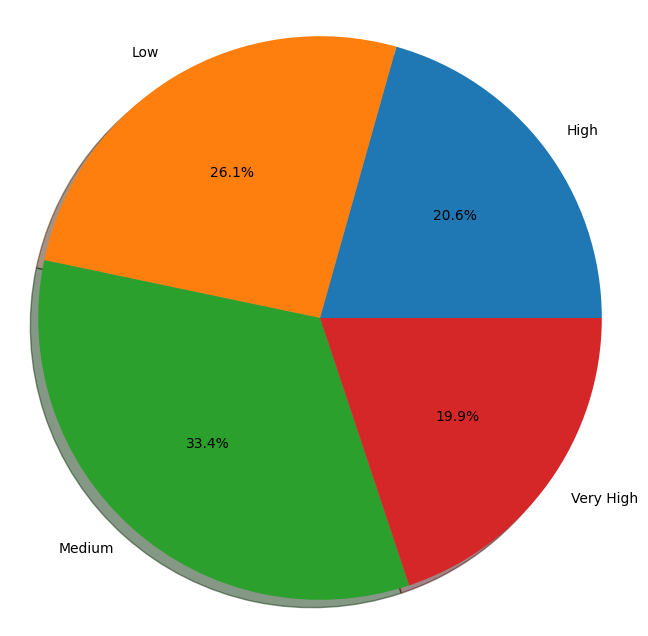

In [35]:

labels = df['Flag'].astype('category').cat.categories. tolist()
counts = df['Flag'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
figi, ax1 = plt. subplots (figsize = (8,8))
ax1. pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1. axis ('equal')
plt. show()

In [36]:
#from pandas_visual_analysis import VisualAnalysis
print(df.columns)
df.dtypes

Index(['Transaction_unique_identifier', 'price', 'Date_of_Transfer',
       'postcode', 'Property_Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPDCategory_Type', 'Record_Status - monthly_file_only', 'year',
       'Flag'],
      dtype='object')


Transaction_unique_identifier                object
price                                         int64
Date_of_Transfer                     datetime64[ns]
postcode                                     object
Property_Type                                object
Old/New                                      object
Duration                                     object
PAON                                         object
SAON                                         object
Street                                       object
Locality                                     object
Town/City                                    object
District                                     object
County                                       object
PPDCategory_Type                             object
Record_Status - monthly_file_only            object
year                                          int64
Flag                                         object
dtype: object

In [37]:
df.nunique()

Transaction_unique_identifier        1035342
price                                  32735
Date_of_Transfer                         365
postcode                              542290
Property_Type                              5
Old/New                                    2
Duration                                   2
PAON                                   86770
SAON                                   12007
Street                                181716
Locality                               16804
Town/City                               1147
District                                 361
County                                   117
PPDCategory_Type                           2
Record_Status - monthly_file_only          1
year                                       1
Flag                                       4
dtype: int64

In [38]:
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,Flag
23138908,{726BF13A-993E-0A46-E053-6C04A8C01D0D},75000,2018-06-20,DL13 4BA,T,N,F,21,None,HIGHFIELDS,TOW LAW,BISHOP AUCKLAND,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low
23138909,{726BF13A-993F-0A46-E053-6C04A8C01D0D},115000,2018-07-13,DL17 9LB,S,N,F,4,None,THE LANE,WEST CORNFORTH,FERRYHILL,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low
23138910,{726BF13A-9940-0A46-E053-6C04A8C01D0D},24000,2018-04-10,SR7 9AG,F,N,L,20B,None,WOODS TERRACE,MURTON,SEAHAM,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low
23138911,{726BF13A-9941-0A46-E053-6C04A8C01D0D},56000,2018-06-22,DL5 5PS,T,N,F,6,None,HEILD CLOSE,None,NEWTON AYCLIFFE,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low
23138912,{726BF13A-9942-0A46-E053-6C04A8C01D0D},220000,2018-05-25,DL16 7HE,D,N,F,25,None,BECKWITH CLOSE,KIRK MERRINGTON,SPENNYMOOR,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Medium


In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Street_encoded'] = label_encoder.fit_transform(df['Street'])
df['Locality_encoded'] = label_encoder.fit_transform(df['Locality'])
df['Town/City_encoded'] = label_encoder.fit_transform(df['Town/City'])
df['District_encoded'] = label_encoder.fit_transform(df['District'])
df['County_encoded'] = label_encoder.fit_transform(df['County'])

In [40]:
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,Flag,Street_encoded,Locality_encoded,Town/City_encoded,District_encoded,County_encoded
23138908,{726BF13A-993E-0A46-E053-6C04A8C01D0D},75000,2018-06-20,DL13 4BA,T,N,F,21,None,HIGHFIELDS,TOW LAW,BISHOP AUCKLAND,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low,79441,14806,113,81,27
23138909,{726BF13A-993F-0A46-E053-6C04A8C01D0D},115000,2018-07-13,DL17 9LB,S,N,F,4,None,THE LANE,WEST CORNFORTH,FERRYHILL,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low,159397,15732,383,81,27
23138910,{726BF13A-9940-0A46-E053-6C04A8C01D0D},24000,2018-04-10,SR7 9AG,F,N,L,20B,None,WOODS TERRACE,MURTON,SEAHAM,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low,179588,10114,870,81,27
23138911,{726BF13A-9941-0A46-E053-6C04A8C01D0D},56000,2018-06-22,DL5 5PS,T,N,F,6,None,HEILD CLOSE,None,NEWTON AYCLIFFE,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low,76553,16804,720,81,27
23138912,{726BF13A-9942-0A46-E053-6C04A8C01D0D},220000,2018-05-25,DL16 7HE,D,N,F,25,None,BECKWITH CLOSE,KIRK MERRINGTON,SPENNYMOOR,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Medium,11832,7909,923,81,27


In [41]:
# df = pd.get_dummies(df, columns=['Property_Type', 'Old/New', 'Duration', 'PPDCategory_Type'])

df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,Flag,Street_encoded,Locality_encoded,Town/City_encoded,District_encoded,County_encoded
23138908,{726BF13A-993E-0A46-E053-6C04A8C01D0D},75000,2018-06-20,DL13 4BA,T,N,F,21,None,HIGHFIELDS,TOW LAW,BISHOP AUCKLAND,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low,79441,14806,113,81,27
23138909,{726BF13A-993F-0A46-E053-6C04A8C01D0D},115000,2018-07-13,DL17 9LB,S,N,F,4,None,THE LANE,WEST CORNFORTH,FERRYHILL,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low,159397,15732,383,81,27
23138910,{726BF13A-9940-0A46-E053-6C04A8C01D0D},24000,2018-04-10,SR7 9AG,F,N,L,20B,None,WOODS TERRACE,MURTON,SEAHAM,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low,179588,10114,870,81,27
23138911,{726BF13A-9941-0A46-E053-6C04A8C01D0D},56000,2018-06-22,DL5 5PS,T,N,F,6,None,HEILD CLOSE,None,NEWTON AYCLIFFE,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low,76553,16804,720,81,27
23138912,{726BF13A-9942-0A46-E053-6C04A8C01D0D},220000,2018-05-25,DL16 7HE,D,N,F,25,None,BECKWITH CLOSE,KIRK MERRINGTON,SPENNYMOOR,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Medium,11832,7909,923,81,27


In [42]:
df.PAON.unique()[:]

array(['21', '4', '20B', ..., 'FAENOL ISAF FARM', 'ASHOVER',
       'DARLAND GROVES'], dtype=object)

In [43]:
df.columns

Index(['Transaction_unique_identifier', 'price', 'Date_of_Transfer',
       'postcode', 'Property_Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPDCategory_Type', 'Record_Status - monthly_file_only', 'year', 'Flag',
       'Street_encoded', 'Locality_encoded', 'Town/City_encoded',
       'District_encoded', 'County_encoded'],
      dtype='object')

In [44]:
df.dtypes

Transaction_unique_identifier                object
price                                         int64
Date_of_Transfer                     datetime64[ns]
postcode                                     object
Property_Type                                object
Old/New                                      object
Duration                                     object
PAON                                         object
SAON                                         object
Street                                       object
Locality                                     object
Town/City                                    object
District                                     object
County                                       object
PPDCategory_Type                             object
Record_Status - monthly_file_only            object
year                                          int64
Flag                                         object
Street_encoded                                int64
Locality_enc

In [45]:
df['Record_Status - monthly_file_only'].unique()

array(['A'], dtype=object)

In [46]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['PAON'] = df['PAON'].apply(lambda x: label_encoder.fit_transform([x]) if isinstance(x, str) else x)
df['SAON'] = df['SAON'].apply(lambda x: label_encoder.fit_transform([x]) if isinstance(x, str) else x)
# 'Property_Type', 'Old/New', 'Duration', 'PPDCategory_Type'
df['Property_Type'] = df['Property_Type'].apply(lambda x: label_encoder.fit_transform([x]) if isinstance(x, str) else x)
df['Old/New'] = df['Old/New'].apply(lambda x: label_encoder.fit_transform([x]) if isinstance(x, str) else x)
df['Duration'] = df['Duration'].apply(lambda x: label_encoder.fit_transform([x]) if isinstance(x, str) else x)
df['PPDCategory_Type'] = df['PPDCategory_Type'].apply(lambda x: label_encoder.fit_transform([x]) if isinstance(x, str) else x)

In [47]:
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,Flag,Street_encoded,Locality_encoded,Town/City_encoded,District_encoded,County_encoded
23138908,{726BF13A-993E-0A46-E053-6C04A8C01D0D},75000,2018-06-20,DL13 4BA,[0],[0],[0],[0],None,HIGHFIELDS,TOW LAW,BISHOP AUCKLAND,COUNTY DURHAM,COUNTY DURHAM,[0],A,2018,Low,79441,14806,113,81,27
23138909,{726BF13A-993F-0A46-E053-6C04A8C01D0D},115000,2018-07-13,DL17 9LB,[0],[0],[0],[0],None,THE LANE,WEST CORNFORTH,FERRYHILL,COUNTY DURHAM,COUNTY DURHAM,[0],A,2018,Low,159397,15732,383,81,27
23138910,{726BF13A-9940-0A46-E053-6C04A8C01D0D},24000,2018-04-10,SR7 9AG,[0],[0],[0],[0],None,WOODS TERRACE,MURTON,SEAHAM,COUNTY DURHAM,COUNTY DURHAM,[0],A,2018,Low,179588,10114,870,81,27
23138911,{726BF13A-9941-0A46-E053-6C04A8C01D0D},56000,2018-06-22,DL5 5PS,[0],[0],[0],[0],None,HEILD CLOSE,None,NEWTON AYCLIFFE,COUNTY DURHAM,COUNTY DURHAM,[0],A,2018,Low,76553,16804,720,81,27
23138912,{726BF13A-9942-0A46-E053-6C04A8C01D0D},220000,2018-05-25,DL16 7HE,[0],[0],[0],[0],None,BECKWITH CLOSE,KIRK MERRINGTON,SPENNYMOOR,COUNTY DURHAM,COUNTY DURHAM,[0],A,2018,Medium,11832,7909,923,81,27


In [48]:
# Transaction_unique_identifier                object --> Not required for modelling
# price                                         int64 --> Price is not required as we are trying to predict the category without knowing the actual price
# Date_of_Transfer                     datetime64[ns] --> Year is required
# postcode                                     object --> post code is also required
# PAON                                         object --> Primary Addressable Object Name, as of now checking on this if this is required for modelling
# SAON                                         object --> Secondary Addressable Object Name seems to be not required but will check with this.
# Street                                       object --> Street is required as it may have some waitage.
# Locality                                     object --> May be this is a required column
# Town/City                                    object --> This is required columns
# District                                     object --> This is also a required field
# County                                       object --> required
# Record_Status - monthly_file_only            object --> It has only one value which would not give any information.
# year                                          int64 --> Derived from Date of transfer
# Flag                                         object --> Derived from Price field.
# Street_encoded                                int64 --> R
# Locality_encoded                              int64 --> R as of now
# Town/City_encoded                             int64 --> R
# District_encoded                              int64 --> R
# County_encoded                                int64 --> R
# Property_Type_D                               uint8 --> R
# Property_Type_F                               uint8 --> R
# Property_Type_O                               uint8 --> R
# Property_Type_S                               uint8 --> R
# Property_Type_T                               uint8 --> R
# Old/New_N                                     uint8 --> R
# Old/New_Y                                     uint8 --> R
# Duration_F                                    uint8 --> R
# Duration_L                                    uint8 --> R
# Duration_U                                    uint8 --> R
# PPDCategory_Type_A                            uint8 --> R
# PPDCategory_Type_B                            uint8 --> R

## we are going to take the columns [year,Flag,Street_encoded,Locality_encoded,Town/City_encoded,District_encoded,
##                                   County_encoded,Property_Type_D,Property_Type_F,Property_Type_O,Property_Type_S,
##                                   Property_Type_T,Old/New_N,Old/New_Y,Duration_F,Duration_L,Duration_U,
##                                   PPDCategory_Type_A,PPDCategory_Type_B]



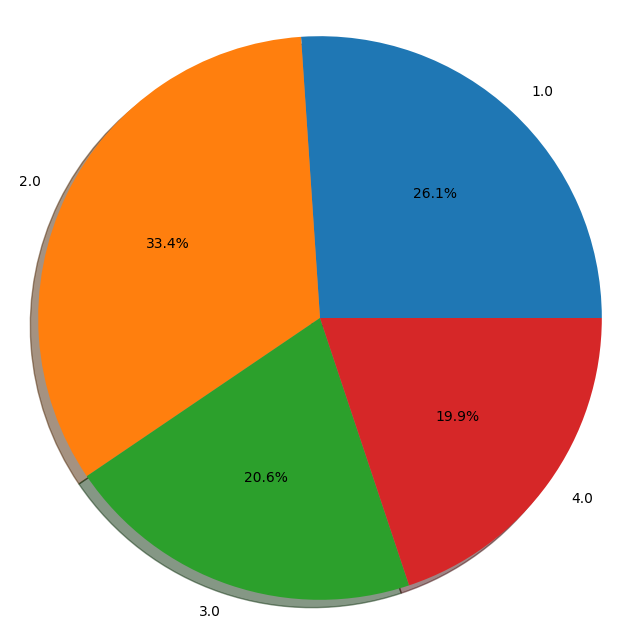

In [49]:
# manual ordinal encoding the target variable
df.loc[df.index[(df.Flag=='Low')],'Target_Flag']= 1
df.loc[df.index[(df.Flag=='Medium')],'Target_Flag']= 2
df.loc[df.index[(df.Flag=='High')],'Target_Flag']= 3
df.loc[df.index[(df.Flag=='Very High')],'Target_Flag']= 4

labels = df['Target_Flag'].astype('category').cat.categories. tolist()
counts = df['Target_Flag'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
figi, ax1 = plt. subplots (figsize = (8,8))
ax1. pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1. axis ('equal')
plt. show()

In [50]:
df.columns

Index(['Transaction_unique_identifier', 'price', 'Date_of_Transfer',
       'postcode', 'Property_Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPDCategory_Type', 'Record_Status - monthly_file_only', 'year', 'Flag',
       'Street_encoded', 'Locality_encoded', 'Town/City_encoded',
       'District_encoded', 'County_encoded', 'Target_Flag'],
      dtype='object')

In [54]:
df1 = df.loc[df.index[(df.year>=2018)&(df.year<=2018)]][['Transaction_unique_identifier', 'year',
       'Street_encoded', 'Locality_encoded', 'Town/City_encoded',
       'District_encoded', 'County_encoded', 'Property_Type',
       'Old/New', 'PPDCategory_Type','Duration',
       'Target_Flag']].copy()

del df

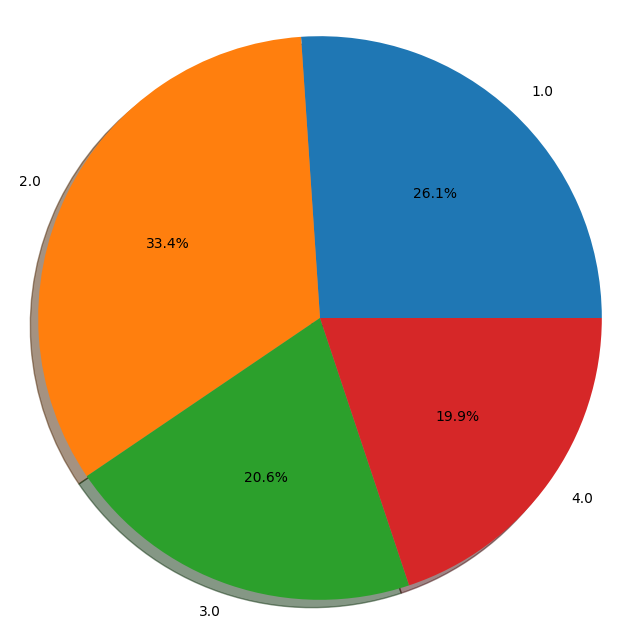

In [55]:
labels = df1['Target_Flag'].astype('category').cat.categories. tolist()
counts = df1['Target_Flag'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
figi, ax1 = plt. subplots (figsize = (8,8))
ax1. pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1. axis ('equal')
plt. show()

In [56]:
df1.head()

,Transaction_unique_identifier,year,Street_encoded,Locality_encoded,Town/City_encoded,District_encoded,County_encoded,Property_Type,Old/New,PPDCategory_Type,Duration,Target_Flag
23138908,{726BF13A-993E-0A46-E053-6C04A8C01D0D},2018,79441,14806,113,81,27,[0],[0],[0],[0],1.0
23138909,{726BF13A-993F-0A46-E053-6C04A8C01D0D},2018,159397,15732,383,81,27,[0],[0],[0],[0],1.0
23138910,{726BF13A-9940-0A46-E053-6C04A8C01D0D},2018,179588,10114,870,81,27,[0],[0],[0],[0],1.0
23138911,{726BF13A-9941-0A46-E053-6C04A8C01D0D},2018,76553,16804,720,81,27,[0],[0],[0],[0],1.0
23138912,{726BF13A-9942-0A46-E053-6C04A8C01D0D},2018,11832,7909,923,81,27,[0],[0],[0],[0],2.0


In [57]:
df1.dtypes

Transaction_unique_identifier     object
year                               int64
Street_encoded                     int64
Locality_encoded                   int64
Town/City_encoded                  int64
District_encoded                   int64
County_encoded                     int64
Property_Type                     object
Old/New                           object
PPDCategory_Type                  object
Duration                          object
Target_Flag                      float64
dtype: object

In [58]:
print(len(df1))
print(df1.Transaction_unique_identifier.nunique())

1035342
1035342


In [59]:
df1.year.value_counts(dropna=False)

2018    1035342
Name: year, dtype: int64

In [60]:
df1.isnull().sum()

Transaction_unique_identifier       0
year                                0
Street_encoded                      0
Locality_encoded                    0
Town/City_encoded                   0
District_encoded                    0
County_encoded                      0
Property_Type                       0
Old/New                             0
PPDCategory_Type                    0
Duration                            0
Target_Flag                      4686
dtype: int64

In [61]:
#print(df[df1.Target_Flag.isnull()].price.max())
#print(df[df1.Target_Flag.isnull()].price.min())

In [62]:
print(df1.shape)
df1.drop(df1.index[(df1.Target_Flag.isnull())],inplace=True)
print(df1.shape)

(1035342, 12)
(1030656, 12)


In [63]:
print(df1.Transaction_unique_identifier.nunique())


1030656


In [64]:
df1.Target_Flag.value_counts(dropna=False)

2.0    344368
1.0    268725
3.0    212667
4.0    204896
Name: Target_Flag, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

X = df1[['year',
       'Street_encoded', 'Locality_encoded', 'Town/City_encoded',
       'District_encoded', 'County_encoded', 'Property_Type',
       'Old/New', 'PPDCategory_Type','Duration']]

Y = df1['Target_Flag']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=121)

In [68]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=843,criterion='gini',n_jobs=-1,oob_score=True)

clf.fit(X_train,Y_train)

x_prediction = clf.predict(X_test)

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print('Accuracy : ', metrics.accuracy_score(Y_test,x_prediction))

Accuracy :  0.6093493791983752


Street_encoded       0.631301
County_encoded       0.107944
Town/City_encoded    0.094701
Locality_encoded     0.090117
District_encoded     0.075938
year                 0.000000
Property_Type        0.000000
Old/New              0.000000
PPDCategory_Type     0.000000
Duration             0.000000
dtype: float64


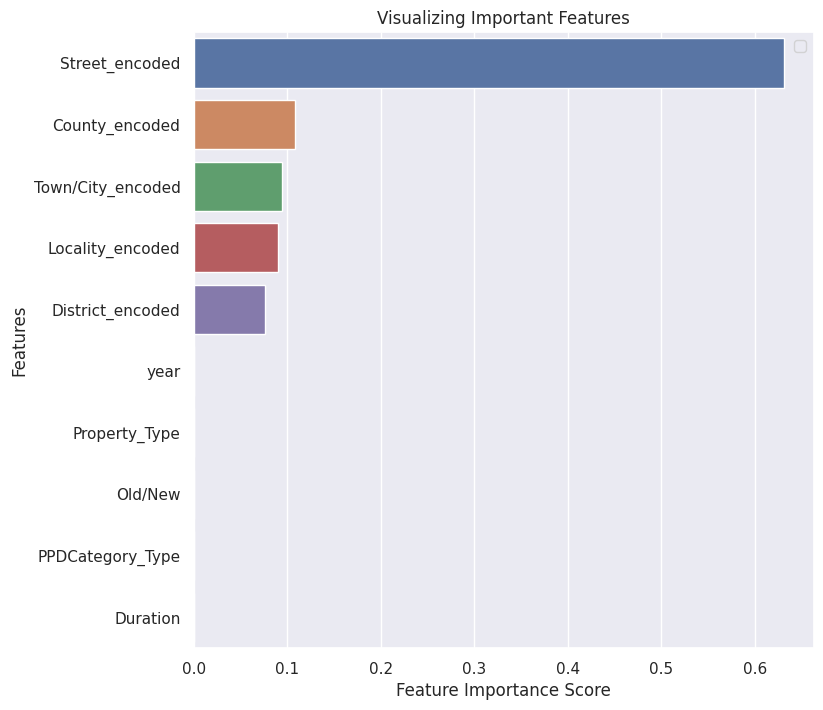

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# feature
feature_imp = pd.Series (clf.feature_importances_, index=X.columns). sort_values (ascending=False)
print (feature_imp)
sns.set(rc={'figure.figsize': (8,8)})
# Creating a bar plot
sns.barplot (x=feature_imp, y=feature_imp.index)
# Add Labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend ()
plt.show()

In [ ]:
# # Split dataset into training set and test set
# N_train, N_test, m_train, m_test = train_test_split(N, m, test_size=0.20, random_state=111) # 70% training and 30% test
# #Import Random Forest Model from sklearn. ensemble import RandomForestClassifier
# #Create a Gaussian Classifier
# c1f2=RandomForestClassifier（n_estimatons=1321, criterion= gina'，n_jobs=-2, oob_score=True）
# #Train the model using the training sets y_pred=clf.predict(X_test)
# c1f2. fit (N_train,m_train)
# m_pred2=c1f2. predict (N_test)
# print ("Accuracy:", metrics. accuracy_score(m_test, m_pred2))

# feature
# imp2 = pd.Series (clf2.feature_importances, index=N. columns). sort_values (ascending=False)
# print (feature_imp2)
# sns. set(rc={figure. figsize: (8,8)})
# # Creating a bar plot
# sns. barplot (x=feature_imp2, y=feature _imp2. index)
# # Add Labels to your graph
# plt.xlabel (Feature Importance Score')
# pIt. ylabel (Features')
# plt. title("Visualizing Important Features")
# plt. legend ()
# pIt. show()
#

# print（"=== Confusion Matrix ==="）
# print pd. Data Frame-Fusion matrix m test, dered write-off 1,
# index=['Actual paid', 'Actual write-off']))
# print ('\n')

# print（"=== Classification Report ＝=="）
# print (classification_report (m_test, m_pred2))
# dump (c1f2,dir2+' /RandomForestClassifier_APC'+str(oSYear)+'wo-Ranking.joblib')
# dump (replace_map_comp2, dir3+' /replace_map_comp2_payername. joblib') dump (replace_map_comp3, dir3+' /replace_map_comp3_providername joblib) dump (replace_map_comp5,dir3+' /replace_map_comp5_CPT_Concat.joblib')

In [74]:
print("=== Confusion Matrix ===")
print(pd.DataFrame(confusion_matrix(X_test, x_prediction)))
print('\n')
print("=== Classification Report ===")
print(classification_report(X_test, x_prediction))

=== Confusion Matrix ===


ValueError: ignored

In [73]:
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd

# # If your Y_test contains string labels, encode them to integers
# label_encoder = LabelEncoder()
# Y_test_encoded = label_encoder.fit_transform(Y_test)
# x_prediction_encoded = label_encoder.transform(x_prediction)

# # Now use the encoded labels to create the confusion matrix
# conf_matrix = confusion_matrix(Y_test_encoded, x_prediction_encoded)
# conf_matrix_df = pd.DataFrame(conf_matrix, columns=label_encoder.classes_, index=label_encoder.classes_)

print("=== Confusion Matrix ===")
print(conf_matrix_df)
print('\n')

print("=== Classification Report ===")
print(classification_report(Y_test_encoded, x_prediction_encoded, target_names=label_encoder.classes_))

=== Confusion Matrix ===
       1.0    2.0    3.0    4.0
1.0  55479  19147   3540   2689
2.0  18105  63853  14955   6183
3.0   3961  17415  29844  12850
4.0   2488   7242  12213  39233


=== Classification Report ===


TypeError: ignored